In [1]:
# Importing Necessory Packages:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re,string,unicodedata
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Loading the Dataset
#%%time 
df = pd.read_csv('IMDB-Dataset.csv',encoding='latin-1')

In [5]:
pd.options.display.max_colwidth = 1000
df.head(5)

,Ratings,Reviews,Movies,Resenhas
0,1.0,"*Disclaimer: I only watched this movie as a conditional agreement. And I see films for free. I wouldn't be caught dead giving my hard earned money to these idiots.Well, to explain the depth of this 'film', I could write my shortest review, ever. Don't see this movie. It is by far the stupidest, lamest, most lazy, and unbelievably UNFUNNY movie I have ever seen. It is a total disaster. But since my hatred for this movie, and the others like it, extends far beyond one viewing, I think I'll go on for a bit.I don't know any of the people in the movie besides Carmen Electra, Vanessa Minnillo, and Kim Kardashian, but it doesn't matter. They're all horrible, though I think that was the point. The editing is flat out horrible, and possibly blatant continuity errors make this crapfast even crappier than I thought it would be. Now I know that these films are not supposed to be serious at all, but come on, it's film-making 101 that if someone gets a minor facial cut, it should be there in the...",Disaster Movie,"* IsenÃ§Ã£o de responsabilidade: eu sÃ³ assisti esse filme como um acordo condicional. E eu vejo filmes de graÃ§a. Eu nÃ£o seria pego morto dando meu dinheiro suado a esses idiotas. Bem, para explicar a profundidade desse 'filme', eu poderia escrever minha crÃ­tica mais curta de todos os tempos. NÃ£o vÃª este filme. Ã de longe o filme mais estÃºpido, lamenta, preguiÃ§oso e inacreditavelmente UNFUNNY que eu jÃ¡ vi. Ã um desastre total. Mas como o meu Ã³dio por este filme e por outros, se estende muito alÃ©m de uma exibiÃ§Ã£o, acho que vou continuar um pouco. NÃ£o conheÃ§o nenhuma das pessoas do filme alÃ©m de Carmen Electra, Vanessa Minnillo, e Kim Kardashian, mas isso nÃ£o importa. Eles sÃ£o todos horrÃ­veis, embora eu ache que esse seja o ponto. A ediÃ§Ã£o Ã© horrÃ­vel e, possivelmente, erros de continuidade flagrantes tornam essa porcaria ainda mais horrÃ­vel do que eu pensava. Agora eu sei que esses filmes nÃ£o devem ser sÃ©rios, mas vamos lÃ¡, Ã© o cinema 101 que se alguÃ©m f..."
1,1.0,"I am writing this in hopes that this gets put over the previous review of this ""film"". How anyone can find this slop entertaining is completely beyond me. First of all a spoof film entitled ""Disaster Movie"", should indeed be a spoof on disaster films. Now I have seen 1 (yes count them, 1) disaster film being spoofed, that being ""Twister"". How does Juno, Iron Man, Batman, The Hulk, Alvin and the Chipmunks, Amy Winehouse, or Hancock register as Disaster films? Selzterwater and Failburg once again have shown that they lack any sort of writing skill and humor. Having unfortunately been tortured with Date Movie and Epic Movie I know exactly what to expect from these two...no plot, no jokes just bad references and cheaply remade scenes from other films. Someone should have informed them that satire is more than just copy and paste from one film to another, though I shouldn't say that because some of these actually just seem to be taken from trailers.There is nothing clever or witty or re...",Disaster Movie,"Estou escrevendo isso na esperanÃ§a de que isso seja colocado sobre a revisÃ£o anterior deste ""filme"". Como alguÃ©m pode achar divertido esse desleixo estÃ¡ completamente alÃ©m de mim. Antes de mais nada, um filme de parÃ³dia intitulado ""Filme de desastre"" deveria ser, de fato, uma parÃ³dia de filmes de desastre. Agora eu jÃ¡ vi 1 (sim, conte-os, 1) filme de desastre sendo falsificado, sendo ""Twister"". Como Juno, Homem de Ferro, Batman, O Hulk, Alvin e os Esquilos, Amy Winehouse ou Hancock se registram como filmes de Desastre? Selzterwater e Failburg mostraram mais uma vez que nÃ£o possuem nenhum tipo de habilidade e humor de escrita. Infelizmente, tendo sido torturado com Date Movie e Epic Movie, sei exatamente o que esperar desses dois ... nenhum enredo, nenhuma piada, apenas mÃ¡s referÃªncias e cenas refeitas de outros filmes. AlguÃ©m deveria ter informado a eles que a sÃ¡tira Ã© mais do qu

In [6]:
df.shape

(150000, 4)

In [7]:
df['Ratings'].value_counts()

Ratings
1.0     15000
2.0     15000
4.0     15000
3.0     15000
5.0     15000
6.0     15000
8.0     15000
7.0     15000
10.0    15000
9.0     15000
Name: count, dtype: int64

In [ ]:
# It is clear that class is equally distributed.

## Data Cleaning and Preprocessing:

In [13]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [6]:
#Customize stopword as per data
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
new_stopwords = ["would","shall","could","might"] # nltk didnt has these stopwords predefined so we hv to add
stop_words.extend(new_stopwords)
stop_words.remove("not")  # To check the sarcasm, multi polarity reviews
stop_words=set(stop_words)
print(stop_words)

{'theirs', 'who', 'about', 'isn', 'out', 'has', 't', 'ourselves', 'same', "hadn't", 'what', "wouldn't", 'which', 'had', 'then', "you've", 'shan', 'ma', 'haven', 'why', 'themselves', 'our', 'hasn', 'other', 'am', 'some', 'did', 'up', "she's", 'in', 'all', 'against', 'further', 'didn', "won't", 'can', 'over', 'few', 'when', 'them', 'i', 'hers', 'how', "hasn't", "isn't", 'your', 'yours', "you'd", 'have', "needn't", 'but', 'me', 'couldn', 'shouldn', "mightn't", "aren't", 'will', "should've", 'ours', 'both', 'an', 'with', 'own', 'yourselves', 'does', 'yourself', 'needn', 'above', 'would', 'herself', 'hadn', "shouldn't", 'after', 'wasn', 'and', 'at', 'most', 'from', 'they', "shan't", 'too', 'until', 'wouldn', 'myself', 'you', "you're", 'each', 'be', 'very', 'between', "don't", 'these', 'by', 'o', 'are', 'were', 'off', 'through', 'before', 'here', 'doesn', 'weren', 'into', 'could', 'the', 'while', 'do', 'having', 'under', 'than', "that'll", 'during', 'if', 'that', 'being', 'its', 'no', 'his',

In [7]:
#Removing special character
def remove_special_character(content):
    return re.sub('\W+',' ', content )#re.sub('\[[^&@#!]]*\]', '', content)

# Removing URL's
def remove_url(content):
    return re.sub(r'http\S+', '', content)

#Removing the stopwords from text
def remove_stopwords(content):
    clean_data = []
    for i in content.split():
        if i.strip().lower() not in stop_words and i.strip().lower().isalpha():
            clean_data.append(i.strip().lower())
    return " ".join(clean_data)

# Expansion of english contractions
def contraction_expansion(content):
    content = re.sub(r"won\'t", "would not", content)
    content = re.sub(r"can\'t", "can not", content)
    content = re.sub(r"don\'t", "do not", content)
    content = re.sub(r"shouldn\'t", "should not", content)
    content = re.sub(r"needn\'t", "need not", content)
    content = re.sub(r"hasn\'t", "has not", content)
    content = re.sub(r"haven\'t", "have not", content)
    content = re.sub(r"weren\'t", "were not", content)
    content = re.sub(r"mightn\'t", "might not", content)
    content = re.sub(r"didn\'t", "did not", content)
    content = re.sub(r"n\'t", " not", content)
    '''content = re.sub(r"\'re", " are", content)
    content = re.sub(r"\'s", " is", content)
    content = re.sub(r"\'d", " would", content)
    content = re.sub(r"\'ll", " will", content)
    content = re.sub(r"\'t", " not", content)
    content = re.sub(r"\'ve", " have", content)
    content = re.sub(r"\'m", " am", content)'''
    return content

In [8]:
#Data preprocessing
def data_cleaning(content):
    content = contraction_expansion(content)
    content = remove_special_character(content)
    content = remove_url(content)
    
    content = remove_stopwords(content)    
    return content

In [9]:
%%time
#Data cleaning
df['Reviews_clean']=df['Reviews'].apply(data_cleaning)

CPU times: total: 25.1 s
Wall time: 25.7 s


In [10]:
#pd.options.display.max_colwidth = 1000
df.head(5)

,Ratings,Reviews,Movies,Resenhas,Reviews_clean
0,1.0,"*Disclaimer: I only watched this movie as a conditional agreement. And I see films for free. I wouldn't be caught dead giving my hard earned money to these idiots.Well, to explain the depth of this 'film', I could write my shortest review, ever. Don't see this movie. It is by far the stupidest, lamest, most lazy, and unbelievably UNFUNNY movie I have ever seen. It is a total disaster. But since my hatred for this movie, and the others like it, extends far beyond one viewing, I think I'll go on for a bit.I don't know any of the people in the movie besides Carmen Electra, Vanessa Minnillo, and Kim Kardashian, but it doesn't matter. They're all horrible, though I think that was the point. The editing is flat out horrible, and possibly blatant continuity errors make this crapfast even crappier than I thought it would be. Now I know that these films are not supposed to be serious at all, but come on, it's film-making 101 that if someone gets a minor facial cut, it should be there in the...",Disaster Movie,"* IsenÃ§Ã£o de responsabilidade: eu sÃ³ assisti esse filme como um acordo condicional. E eu vejo filmes de graÃ§a. Eu nÃ£o seria pego morto dando meu dinheiro suado a esses idiotas. Bem, para explicar a profundidade desse 'filme', eu poderia escrever minha crÃ­tica mais curta de todos os tempos. NÃ£o vÃª este filme. Ã de longe o filme mais estÃºpido, lamenta, preguiÃ§oso e inacreditavelmente UNFUNNY que eu jÃ¡ vi. Ã um desastre total. Mas como o meu Ã³dio por este filme e por outros, se estende muito alÃ©m de uma exibiÃ§Ã£o, acho que vou continuar um pouco. NÃ£o conheÃ§o nenhuma das pessoas do filme alÃ©m de Carmen Electra, Vanessa Minnillo, e Kim Kardashian, mas isso nÃ£o importa. Eles sÃ£o todos horrÃ­veis, embora eu ache que esse seja o ponto. A ediÃ§Ã£o Ã© horrÃ­vel e, possivelmente, erros de continuidade flagrantes tornam essa porcaria ainda mais horrÃ­vel do que eu pensava. Agora eu sei que esses filmes nÃ£o devem ser sÃ©rios, mas vamos lÃ¡, Ã© o cinema 101 que se alguÃ©m f...",disclaimer watched movie conditional agreement see films free not caught dead giving hard earned money idiots well explain depth film write shortest review ever not see movie far stupidest lamest lazy unbelievably unfunny movie ever seen total disaster since hatred movie others like extends far beyond one viewing think go bit not know people movie besides carmen electra vanessa minnillo kim kardashian not matter horrible though think point editing flat horrible possibly blatant continuity errors make crapfast even crappier thought know films not supposed serious come film making someone gets minor facial cut next shot someone gets cut sword blood least cut though since narnia films get away give disaster movie pass jokes thoughtless mindless physical gags obviously take popular movies last year late well including best picture nominees know saddest thing stupid movies not care much money make many cameos sorry ass excuses films taking away jobs actors writers directors truly deserv...
1,1.0,"I am writing this in hopes that this gets put over the previous review of this ""film"". How anyone can find this slop entertaining is completely beyond me. First of all a spoof film entitled ""Disaster Movie"", should indeed be a spoof on disaster films. Now I have seen 1 (yes count them, 1) disaster film being spoofed, that being ""Twister"". How does Juno, Iron Man, Batman, The Hulk, Alvin and the Chipmunks, Amy Winehouse, or Hancock register as Disaster films? Selzterwater and Failburg once again have shown that they lack any sort of writing skill and humor. Having unfortunately been tortured with Date Movie and Epic Movie I know exactly what to expect from these two...no plot, no jokes just bad references and cheaply remade scenes from other films. Someone should have informed them that satire is more than just copy and paste from one film to another, though I shouldn't say that because some of these ac

In [11]:
#Checking for missing value
df.isna().sum()

Ratings           0
Reviews           0
Movies           25
Resenhas          0
Reviews_clean     0
dtype: int64

In [23]:
df['Ratings'].describe()

count    150000.000000
mean          5.500000
std           2.872291
min           1.000000
25%           3.000000
50%           5.500000
75%           8.000000
max          10.000000
Name: Ratings, dtype: float64

In [40]:
df['Reviews_clean'].describe()

count                                                                   150000
unique                                                                  149755
top       story soundtrack dialog graphic reasonableness entertainment overall
freq                                                                        10
Name: Reviews_clean, dtype: object

### Mapping rating data to Binary label:
positive reviews:1 (+ve) if rating >=7 

Negative Reviews: 0 (-ve) if rating <=4 

Neutral Reviews: 2 (neutral) if rating = 5 or 6

In [12]:
df['Label'] = df['Ratings'].apply(lambda x: '1' if x >= 7 else ('0' if x<=4 else '2'))
df['Label'].value_counts()

Label
0    60000
1    60000
2    30000
Name: count, dtype: int64

In [13]:
#Removing Neutral Reviews because now we are going to do sentiment analysis for positive and negative only: 
df=df[df.Label<'2']
data=df[['Reviews_clean','Label']]
print(data['Label'].value_counts())

Label
0    60000
1    60000
Name: count, dtype: int64


In [14]:
#Importing dependencies for feature engineering 
import sys
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from prettytable import PrettyTable
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer

## Lemmatization:
It basically converts the word to its root word.

In [17]:
# lemmatization of word 
class LemmaTokenizer(object):
    def __init__(self):
        self.wordnetlemma = WordNetLemmatizer()
    def __call__(self, reviews):
        return [self.wordnetlemma.lemmatize(word) for word in word_tokenize(reviews)]

## Vectoization with Count Vectorizer and TDIDF Vectorizer with Unigram

Notes:
Here max_feature = 500 which means it takes top 500 most frequent used words from entire Dataset
and makes the encodings.
analyzer = 'word' which means it takes each words as tokens. you can give each character as token also.
min_df =10 means it takes only words that appear in atleast 10 documents. so it filter out very rare words

In [15]:
# If we use ngram_range=(1,3) then all three unigram,bigram,trigram will act as individual feature.
train,test=train_test_split(data,test_size=0.3,random_state=42, shuffle=True)
#countvect = CountVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(1,3), min_df=10,max_features=5000)
tfidfvect = TfidfVectorizer(analyzer = "word", ngram_range=(1,3),min_df=10,max_features=10000)
#x_train_count = countvect.fit_transform(train['Reviews_clean']).toarray()
#x_test_count = countvect.transform(test['Reviews_clean']).toarray()

In [16]:
%%time
x_train_tfidf = tfidfvect.fit_transform(train['Reviews_clean']).toarray()
x_test_tfidf = tfidfvect.transform(test['Reviews_clean']).toarray()

CPU times: total: 1min 15s
Wall time: 1min 39s


In [17]:
y_train = train['Label']
y_test = test['Label']

In [18]:
# Import prerequisite libraries
import sys
import numpy as np
import scipy as sp
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score, precision_score, recall_score
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

## Training of Logistic Regression Model

In [20]:
'''model_1 = Pipeline(
    steps=[
        #best base model("classifier", LogisticRegression(penalty='l2',dual=False, tol=0.0001, C=1.0, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None)),
    ("classifier", LogisticRegression())]
)'''
model_1=LogisticRegression(penalty='l2',dual=False, tol=0.0001, C=10, solver='lbfgs', max_iter=200, multi_class='auto', verbose=0, warm_start=False, n_jobs=None)
model_2=Pipeline(
    steps=[
        #best base model("classifier", LogisticRegression(penalty='l2',dual=False, tol=0.0001, C=1.0, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None)),
    ('vect',TfidfVectorizer(analyzer = "word", ngram_range=(1,3),min_df=10,max_features=10000)),("classifier", LogisticRegression(penalty='l2',dual=False, tol=0.0001, C=10, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None))]
)

In [21]:
%%time
model_1.fit(x_train_tfidf,y_train)

CPU times: total: 43min 5s
Wall time: 45min 14s


LogisticRegression(C=10, max_iter=200)

In [22]:
%%time
model_2.fit(train['Reviews_clean'],y_train)

CPU times: total: 1min 23s
Wall time: 1min 33s


Pipeline(steps=[('vect',
                 TfidfVectorizer(max_features=10000, min_df=10,
                                 ngram_range=(1, 3))),
                ('classifier', LogisticRegression(C=10))])

In [23]:
%%time
print("Precision Score for Logistic Regression: %s" % precision_score(y_test,model_1.predict(x_test_tfidf),average='micro'))
print("Recall Score for Logistic Regression: %s" % recall_score(y_test,model_1.predict(x_test_tfidf),average='micro'))
print("AUC Score for Logistic Regression: %s" % roc_auc_score(y_test,model_1.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_1 =f1_score(y_test,model_1.predict(x_test_tfidf),average="weighted")
print("F1 Score for Logistic Regression: %s" % f1_score_1)
print("Accuracy Score for Logistic Regression: %s" % accuracy_score(y_test,model_1.predict(x_test_tfidf)))
print("Precision Score for Logistic Regression Pipeline: %s" % precision_score(y_test,model_2.predict(test['Reviews_clean']),average='micro'))
print("Recall Score for Logistic Regression Pipeline: %s" % recall_score(y_test,model_2.predict(test['Reviews_clean']),average='micro'))
print("AUC Score for Logistic Regression Pipeline: %s" % roc_auc_score(y_test,model_2.predict_proba(test['Reviews_clean'])[:,1],multi_class='ovo',average='macro'))
f1_score_2 =f1_score(y_test,model_2.predict(test['Reviews_clean']),average="weighted")
print("F1 Score for Logistic Regression Pipeline: %s" % f1_score_2)
print("Accuracy Score for Logistic Regression Pipeline: %s" % accuracy_score(y_test,model_2.predict(test['Reviews_clean'])))

Precision Score for Logistic Regression: 0.89175
Recall Score for Logistic Regression: 0.89175
AUC Score for Logistic Regression: 0.9586435008445112
F1 Score for Logistic Regression: 0.8917518068253099
Accuracy Score for Logistic Regression: 0.89175
Precision Score for Logistic Regression Pipeline: 0.89275
Recall Score for Logistic Regression Pipeline: 0.89275
AUC Score for Logistic Regression Pipeline: 0.9594280011013215
F1 Score for Logistic Regression Pipeline: 0.8927518861267915
Accuracy Score for Logistic Regression Pipeline: 0.89275
CPU times: total: 49.2 s
Wall time: 51 s


In [19]:
import joblib

In [26]:
joblib.dump(model_2,'log_reg_ppl_sentiment.pkl',compress=True)

['log_reg_ppl_sentiment.pkl']

In [27]:
joblib.dump(model_1,'log_reg1_sentiment.pkl',compress=True)

['log_reg1_sentiment.pkl']

In [20]:
# Loading the model:
model_1 = joblib.load('log_reg1_sentiment.pkl')

In [21]:
#Prediction
y_predict=model_1.predict(x_test_tfidf)
y_predict_prob=model_1.predict_proba(x_test_tfidf)[:,1]

## confusion matrix

In [22]:
def confusion_matrix_plot(y_test,y_score):
    confmatrix = confusion_matrix(y_test,y_score)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(confmatrix)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, confmatrix[i, j], ha='center', va='center', color='red')
    plt.show()

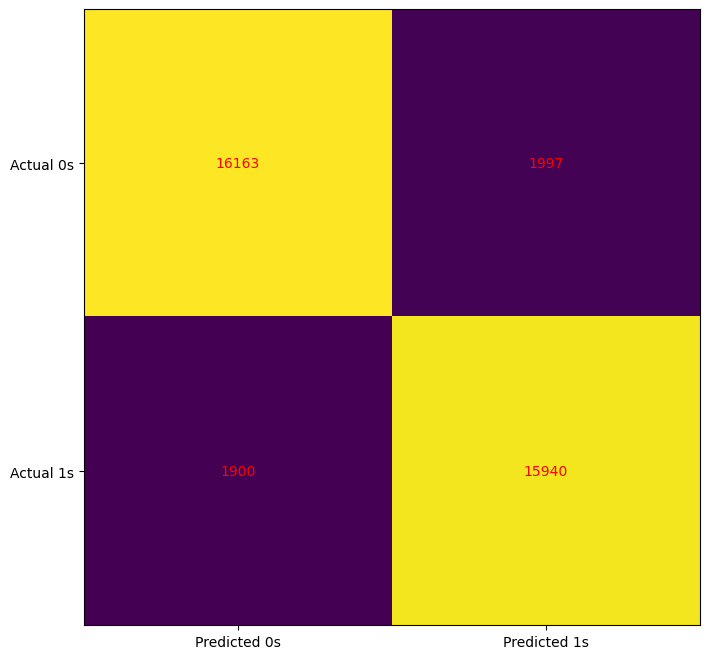

In [23]:
confusion_matrix_plot(y_test,y_predict)

In [22]:
import shap
shap.initjs()

In [25]:
#del x_train_tfidf
#del x_test_tfidf

## XAI: Explainable AI by Shap 

## Explain Marginal Contribution of Features by Shap

In [23]:
explainer = shap.Explainer(model_1, x_train_tfidf, feature_names=tfidfvect.get_feature_names_out())
shap_values = explainer(x_test_tfidf)

LinearExplainer explainer: 36001it [00:15, 712.62it/s]                                                                 


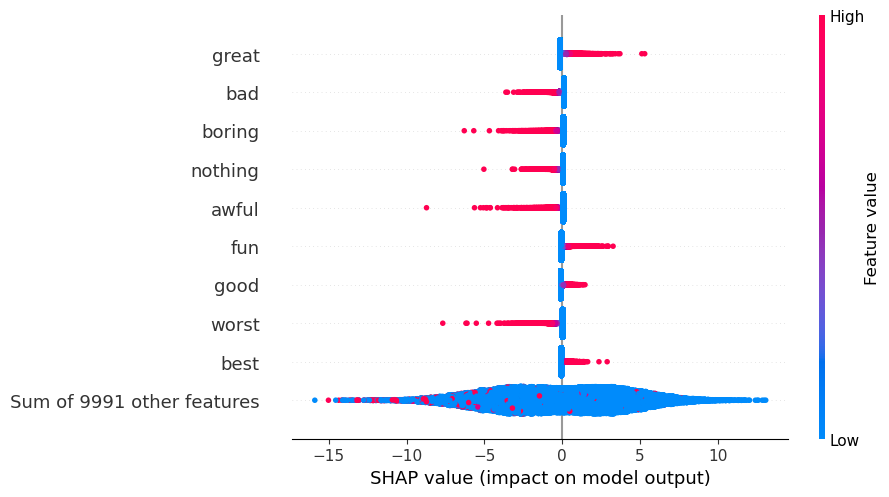

In [26]:
shap.plots.beeswarm(shap_values)

## Visualizing Marginal Contribution of Features

In [27]:
ind = 4443 # choosing random sample to show its marginal features.
#print('Probability Score %s' %y_predict_prob[ind])
shap.plots.force(shap_values[ind])

## Visualizing Marginal Contribution of Features for False Positive 

In [28]:
ind = 111 # select a false positive sample
# print('Probability Score %s' %y_predict_prob[ind])
shap.plots.force(shap_values[ind])

## Visualizing Marginal Contribution of Features for False Negative

In [29]:
ind = 7599 #select a false negative sample
#print('Probability Score %s' %y_predict_prob[ind])
shap.plots.force(shap_values[ind])